# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

### Load dataset

In [3]:
PATH = "data/houses/"

In [4]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False)

In [5]:
df_test_raw = pd.read_csv(f'{PATH}Test.csv', low_memory=False,)
                

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [232]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [233]:
df_raw[['YrSold', 'MoSold']].describe()

,YrSold,MoSold
count,1460.000000,1460.000000
mean,2007.815753,6.321918
std,1.328095,2.703626
min,2006.000000,1.000000
25%,2007.000000,5.000000
50%,2008.000000,6.000000
75%,2009.000000,8.000000
max,2010.000000,12.000000


In [234]:
df_test_raw[['YrSold', 'MoSold']].describe()

,YrSold,MoSold
count,1459.000000,1459.000000
mean,2007.769705,6.104181
std,1.301740,2.722432
min,2006.000000,1.000000
25%,2007.000000,4.000000
50%,2008.000000,6.000000
75%,2009.000000,8.000000
max,2010.000000,12.000000


### Feature engineering

Lets add age

In [235]:
df_raw[['YrSold', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
YrSold       1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(2)
memory usage: 22.9 KB


In [236]:
s = pd.to_numeric(df_raw['YrSold'])

In [237]:
df_raw['YrSold'] = s

In [7]:
df_raw['age'] = df_raw.YrSold-df_raw.YearBuilt

In [8]:
df_raw[['age', 'YrSold', 'YearBuilt']].tail()

,age,YrSold,YearBuilt
1455,8,2007,1999
1456,32,2010,1978
1457,69,2010,1941
1458,60,2010,1950
1459,43,2008,1965


and to the test data

In [9]:
df_test_raw['age'] = df_test_raw.YrSold-df_test_raw.YearBuilt

In [10]:
df_test_raw['age'].tail()

1454    36
1455    36
1456    46
1457    14
1458    13
Name: age, dtype: int64

Total square footage

In [11]:
df_raw['totalSF'] = df_raw['1stFlrSF']+ df_raw['2ndFlrSF'] + df_raw['TotalBsmtSF']

In [12]:
df_raw[['totalSF', 'GrLivArea']].tail()

,totalSF,GrLivArea
1455,2600,1647
1456,3615,2073
1457,3492,2340
1458,2156,1078
1459,2512,1256


isto cemo i na test data

In [13]:
df_test_raw['totalSF'] = df_test_raw['1stFlrSF']+ df_test_raw['2ndFlrSF'] + df_test_raw['TotalBsmtSF']

### RMSLE is the metric:

In [14]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [15]:
df_raw.SalePrice.tail()

1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, dtype: float64

Lets see what data is missing

In [249]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

### Categoricals

In [17]:
train_cats(df_raw)

In [18]:
df_raw.LotShape.cat.categories

Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')

In [19]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/houses-raw')

In [20]:
df_raw = pd.read_feather('tmp/houses-raw')

In [136]:
df_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,totalSF
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051,36.547945,2567.048630
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452,30.250152,821.714421
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242,0.000000,334.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097,8.000000,2009.500000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505,35.000000,2474.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731,54.000000,3004.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473,136.000000,11752.000000


### proc_df

In [21]:
df, y, nas= proc_df(df_raw, 'SalePrice', max_n_cat=10)

In [ ]:
#%debug

In [30]:
df_raw.shape

(1460, 83)

In [22]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 30  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1430, 281), (1430,), (30, 281))

In [23]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [24]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 520 ms
[0.05358875925652733, 0.16200562032684543, 0.9820335620727275, 0.8131130416554656, 0.8682845186782242]


In [259]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([12.56024, 12.6346 , 12.53177, 12.27373, 12.47801, 12.73597, 12.43321, 12.66539, 12.52453, 12.43321,
        12.54254, 12.54254, 12.27839, 12.25248, 12.43321, 12.42922, 12.87902, 12.34801, 12.26434, 12.56024,
        12.34801, 12.30138, 12.87902, 12.56375, 12.51356, 12.34801, 12.57418, 12.6346 , 12.56375, 12.56375,
        12.56375, 12.35978, 12.30138, 12.52088, 12.23077, 12.25248, 12.55673, 12.43321, 12.52453, 12.56024]),
 12.484859965717087,
 12.373703486914124)

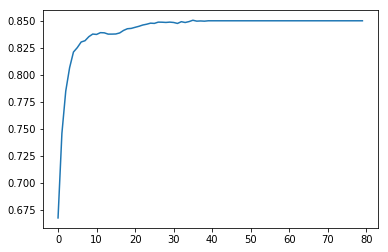

In [207]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(80)]);

In [260]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, min_samples_leaf=1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 540 ms
[0.0595165572087987, 0.1423622653951788, 0.9795675342633003, 0.8606800911830034, 0.8568960033510109]


In [261]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1,  max_features='sqrt', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 171 ms
[0.0618919250317058, 0.14625858483152454, 0.9779040255645353, 0.8529496254813169, 0.8394073397214705]


In [25]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=10)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [26]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 574 ms
[0.07452700911290247, 0.15192510824534056, 0.9652510278682798, 0.8356468841997295, 0.8774330960693995]


In [31]:
fi = rf_feat_importance(m, df_trn); fi[:30]

,cols,imp
5,OverallQual,0.367827
41,totalSF,0.311253
19,GrLivArea,0.041828
7,YearBuilt,0.025481
40,age,0.022527
29,GarageCars,0.021965
30,GarageArea,0.013699
195,CentralAir_N,0.013441
3,LotArea,0.010914
12,BsmtFinSF1,0.010829


In [29]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

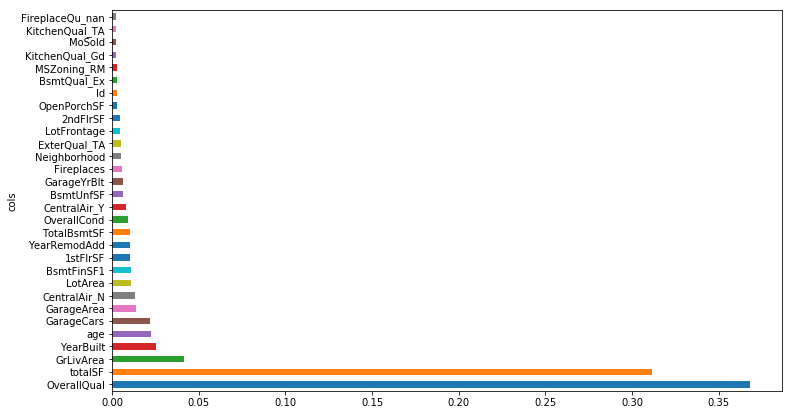

In [30]:
plot_fi(fi[:30]);

In [32]:
to_keep = fi[fi.imp>0.003009].cols; len(to_keep)

23

In [33]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [149]:
df_keep.describe()

,totalSF,OverallQual,GrLivArea,YearBuilt,age,GarageArea,TotalBsmtSF,GarageCars,YearRemodAdd,BsmtFinSF1,...,1stFlrSF,Neighborhood,BsmtUnfSF,LotFrontage,Id,GarageYrBlt,Fireplaces,CentralAir_Y,2ndFlrSF,CentralAir_N
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2567.048630,6.099315,1515.463699,1971.267808,36.547945,472.980137,1057.429452,1.767123,1984.865753,443.639726,...,1162.626712,13.251370,567.240411,69.863699,730.500000,1978.589041,0.613014,0.934932,346.992466,0.065068
std,821.714421,1.382997,525.480383,30.202904,30.250152,213.804841,438.705324,0.747315,20.645407,456.098091,...,386.587738,6.013735,441.866955,22.027677,421.610009,23.997022,0.644666,0.246731,436.528436,0.246731
min,334.000000,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,...,334.000000,1.000000,0.000000,21.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.500000,5.000000,1129.500000,1954.000000,8.000000,334.500000,795.750000,1.000000,1967.000000,0.000000,...,882.000000,8.000000,223.000000,60.000000,365.750000,1962.000000,0.000000,1.000000,0.000000,0.000000
50%,2474.000000,6.000000,1464.000000,1973.000000,35.000000,480.000000,991.500000,2.000000,1994.000000,383.500000,...,1087.000000,13.000000,477.500000,69.000000,730.500000,1980.000000,1.000000,1.000000,0.000000,0.000000
75%,3004.000000,7.000000,1776.750000,2000.000000,54.000000,576.000000,1298.250000,2.000000,2004.000000,712.250000,...,1391.250000,18.000000,808.000000,79.000000,1095.250000,2001.000000,1.000000,1.000000,728.000000,0.000000
max,11752.000000,10.000000,5642.000000,2010.000000,136.000000,1418.000000,6110.000000,4.000000,2010.000000,5644.000000,...,4692.000000,25.000000,2336.000000,313.000000,1460.000000,2010.000000,3.000000,1.000000,2065.000000,1.000000


In [34]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 351 ms
[0.07876283824184663, 0.1527107035738707, 0.9611887801651505, 0.833942770055121, 0.8795245359261302]


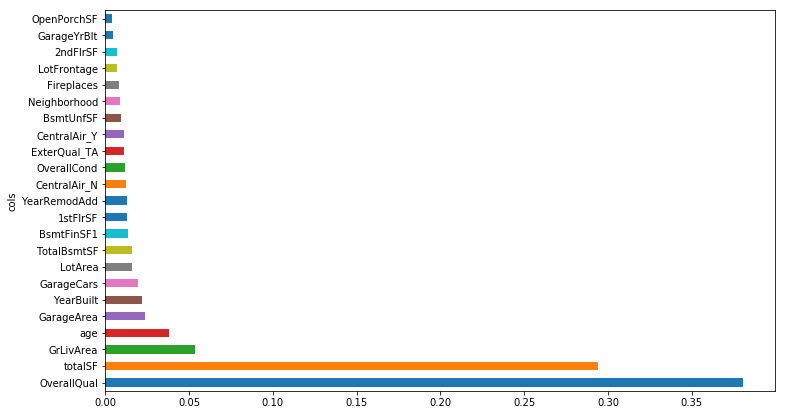

In [35]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

### Extrapolation

In [36]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

C:\Users\pc\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9794520547945206

In [41]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
8,LotArea,0.106995
15,BsmtUnfSF,0.099331
6,GarageArea,0.094411
1,totalSF,0.077516
12,TotalBsmtSF,0.075833
2,GrLivArea,0.067348
16,GarageYrBlt,0.059399
3,YearBuilt,0.053532
4,age,0.047702
22,OpenPorchSF,0.043980


In [43]:
feats=['LotArea','BsmtUnfSF', 'GarageArea', 'totalSF']

In [44]:
(X_train[feats]/1000).describe()

,LotArea,BsmtUnfSF,GarageArea,totalSF
count,1430.000000,1430.000000,1430.000000,1430.000000
mean,10.518757,0.567381,0.473877,2.569636
std,10.060193,0.441713,0.213278,0.824958
min,1.300000,0.000000,0.000000,0.334000
25%,7.536250,0.224250,0.336000,2.012500
50%,9.478500,0.474000,0.480000,2.475000
75%,11.604500,0.806000,0.576000,3.005500
max,215.245000,2.336000,1.418000,11.752000


In [45]:
(X_valid[feats]/1000).describe()

,LotArea,BsmtUnfSF,GarageArea,totalSF
count,30.000000,30.000000,30.000000,30.000000
mean,10.424900,0.560533,0.430233,2.443700
std,5.010604,0.456763,0.237568,0.647501
min,1.533000,0.000000,0.000000,1.260000
25%,8.400000,0.143500,0.258000,1.908500
50%,9.489500,0.588500,0.445500,2.409000
75%,11.569500,0.891250,0.544500,2.822750
max,26.142000,1.573000,0.923000,3.864000


In [48]:
x.drop('LotArea', axis=1, inplace=True)

In [49]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9794520547945206

In [50]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
6,GarageArea,0.123731
14,BsmtUnfSF,0.100265
2,GrLivArea,0.083063
21,OpenPorchSF,0.076334
11,TotalBsmtSF,0.071833
9,1stFlrSF,0.065892
15,GarageYrBlt,0.065689
8,BsmtFinSF1,0.057222
19,LotFrontage,0.056510
10,YearRemodAdd,0.051091


In [51]:
feats=['LotArea', 'GarageArea', 'BsmtUnfSF', '1stFlrSF', 'TotalBsmtSF']

In [52]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07874420443048462, 0.14817684775441287, 0.9612071420072927, 0.8436566058544527, 0.8730123105213118]


In [53]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

LotArea
[0.08241120871623822, 0.15810774010279488, 0.9575099594718945, 0.8219979125848774, 0.8679858412102799]
GarageArea
[0.08184709461245165, 0.15935741675347953, 0.9580896669036096, 0.8191729509448608, 0.8696404752841325]
BsmtUnfSF
[0.0798807355017147, 0.16013460869283336, 0.9600792504096246, 0.8174048496459669, 0.8740135681587813]
1stFlrSF
[0.07975822132365118, 0.15336148267721395, 0.9602016105057163, 0.8325244432922786, 0.8739848547855477]
TotalBsmtSF
[0.08067197330260215, 0.15581697825225088, 0.9592844844788154, 0.8271185531008055, 0.8714496370871527]


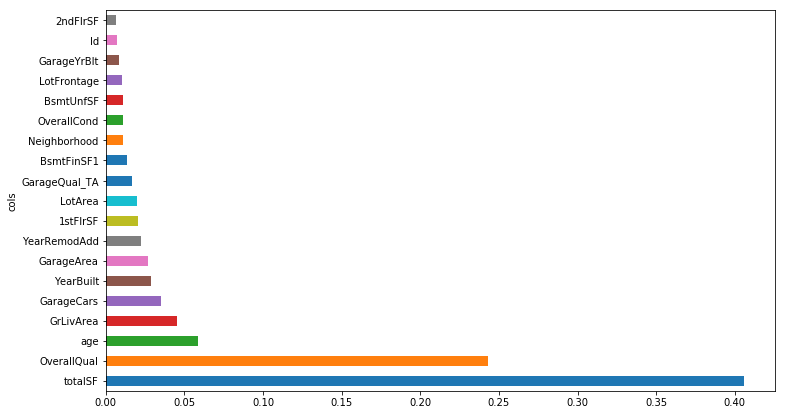

In [286]:
plot_fi(rf_feat_importance(m, X_train));

In [55]:
df_subs = df_keep.drop(['GarageArea', '1stFlrSF'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08305964644768225, 0.16212172686806847, 0.9568386784540932, 0.8128450685584787, 0.8712787949169797]


In [167]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

In [168]:
df_subs.tail()

,totalSF,OverallQual,GrLivArea,YearBuilt,age,TotalBsmtSF,GarageCars,YearRemodAdd,BsmtFinSF1,ExterQual_TA,...,OverallCond,GarageQual_TA,Neighborhood,BsmtUnfSF,LotFrontage,GarageYrBlt,Fireplaces,CentralAir_Y,2ndFlrSF,CentralAir_N
1455,2600,6,1647,1999,8,953,2,2000,0,1,...,5,1,9,953,62.0,1999.0,1,1,694,0
1456,3615,6,2073,1978,32,1542,2,1988,790,1,...,6,1,15,589,85.0,1978.0,2,1,0,0
1457,3492,7,2340,1941,69,1152,1,2006,275,0,...,9,1,7,877,66.0,1941.0,2,1,1152,0
1458,2156,5,1078,1950,60,1078,1,1996,49,1,...,6,1,13,0,68.0,1950.0,0,1,0,0
1459,2512,5,1256,1965,43,1256,1,1965,830,0,...,6,1,8,136,75.0,1965.0,0,1,0,0


### Final model

on all the data?

In [171]:
df_subs.shape

(1460, 21)

In [177]:
n_valid = 1 
n_trn = len(df_subs)-n_valid

In [178]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [179]:
y_train.shape, X_train.shape

((1459,), (1459, 24))

In [180]:
y_valid.shape, X_valid.shape

((1,), (1, 24))

In [56]:
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 408 ms
[0.07859657157740385, 0.1540419676160702, 0.9613524665208905, 0.8310349241526607, 0.8834417120462683]


In [190]:
keeping = X_train.columns

### Test data

In [91]:
df_test_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,36
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,46
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,14
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,13


In [191]:
df_test_raw['SalePrice'] = 0

In [93]:
df_test_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,36,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,46,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,14,0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,13,0


In [192]:
apply_cats(df_test_raw, df_raw)

In [95]:
df_test_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,36,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,46,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,14,0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,13,0


In [193]:
df_test, y, nas = proc_df(df_test_raw, 'SalePrice', na_dict=nas, max_n_cat=10 )

In [106]:
df_test.tail()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
1454,2915,160,21.0,1936,11,4,7,1970,1970,6,...,0,1,0,0,0,0,0,1,0,0
1455,2916,160,21.0,1894,11,4,5,1970,1970,6,...,0,1,0,1,0,0,0,0,0,0
1456,2917,20,160.0,20000,12,5,7,1960,1996,13,...,0,1,0,1,0,0,0,0,0,0
1457,2918,85,62.0,10441,12,5,5,1992,1992,7,...,0,1,0,0,0,0,0,1,0,0
1458,2919,60,74.0,9627,12,7,5,1993,1994,7,...,0,1,0,0,0,0,0,1,0,0


In [194]:
df_test = df_test[keeping]

In [195]:
df_test.columns

Index(['totalSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'age', 'GarageArea',
       'TotalBsmtSF', 'GarageCars', 'YearRemodAdd', 'BsmtFinSF1',
       'ExterQual_TA', 'LotArea', 'OverallCond', 'GarageQual_TA', '1stFlrSF',
       'Neighborhood', 'BsmtUnfSF', 'LotFrontage', 'Id', 'GarageYrBlt',
       'Fireplaces', 'CentralAir_Y', '2ndFlrSF', 'CentralAir_N'],
      dtype='object')

In [196]:
df_test.columns == keeping

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [197]:
preds = m.predict(df_test)

In [198]:
preds

array([1.     , 1.     , 1.     , ..., 0.99479, 1.     , 1.     ])

In [199]:
#id
id = df_test_raw['Id']

In [200]:
submission_df = {"Id": id,
                 "SalePrice": np.exp(preds)}
submission = pd.DataFrame(submission_df)
submission.head()

,Id,SalePrice
0,1461,2.718282
1,1462,2.718282
2,1463,2.718282
3,1464,2.718282
4,1465,2.718282


In [84]:
# save the dataframe to a csv file
submission.to_csv(f'{PATH}submission2.csv',index=False)